In [3]:
import numpy as np
import scipy 
import os
from matplotlib import pyplot as plt 

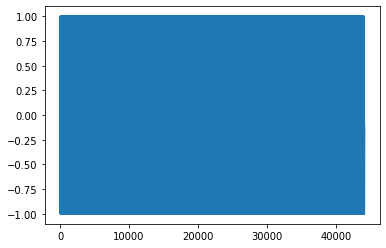

In [331]:
#from scipy.io import wavfile
#fs_wav, data_wav = wavfile.read("./data/filename.wav")

f1=441
f2=882
t=1
fs=44100
samples1=np.arange(t * 44100)
samples2=np.arange(t * 44100)
sig_a=np.sin(2*np.pi*f1*samples1/fs)
sig_b=np.sin(2*np.pi*f2*samples2/fs)
sig=np.append(sig_a,sig_b)
samples=np.append(samples1,samples2)

#plt.title("Matplotlib demo") 
#plt.xlabel("x axis caption") 
#plt.ylabel("y axis caption") 
plt.plot(samples,sig)
plt.show()

In [330]:
file_length=sig.shape[0]#10241
blockSize=1024
hopSize=512
fs=128


In [132]:
def block_audio(x,blockSize,hopSize,fs):
    #Returns a matrix [numblocks * blocksize] and starttimeinsecs
    a=1
    file_length=x.shape[0]
    numBlocks = np.floor((file_length-blockSize)/hopSize + 1).astype(int) # throws error if not cast as int
    numZeroes= hopSize-(file_length%hopSize)# file_length-[(hopSize*numBlocks) ]
    x=np.append(x,np.zeros(numZeroes))
    i=0
    lst=[]
    ts=[]
    for blk in range(0,numBlocks):
        if i == 0:
            start = 0
            i=i+1
        end = start + blockSize
        lst.append(x[start:end])
        #print(start)
        ts.append(start/fs)
        start = start + hopSize
        end = end + hopSize
        out = np.array(lst)
        time = np.array(ts)
    return(out,time)


In [311]:
def comp_acf(inputVector, bIsNormalized=False):
    correl=[]
    c=[]
    for block in inputVector:
        #print(block)
        z=np.zeros(block.shape[0])
        x=np.append(block,z)
        start=0
        for i in range(0,block.shape[0]):# Offset start of x by i samples
            start = i
            end = start + block.shape[0]
            #print(f"start - {start} end - {end}")
            y=x[start:end]
            #print(y)
            corr = np.dot(y,block)
            #print(corr)
            correl.append(corr) # ADD THE SHIFTED DOT PRODUCT TO THE CORRELATION ARRAY FOR EACH BLOCK
        #print(len(correl))
        c.append(np.array(correl)) # ADD TO LIST WHEN THE BLOCK HAS BEEN FULLY COMPUTED 
    return np.array(c) # OUTPUT NEEDS TO BE AN ARRAY OF CORRELATION ARRAYS
        

In [326]:
def get_f0_from_acf (r, fs):
    f=[]
    for blk in range(0,r.shape[0]):
        #print(f"block number {blk}")
        p,_=scipy.signal.find_peaks(r[blk])
        print(p[0])
        calculated_ts=p[0]
        f_calc=fs/calculated_ts
        f.append(f_calc)
    return np.array(f)

In [340]:
x=sig[44100:48000]
a,t = block_audio(x,blockSize,hopSize,fs)
f=[]
c = comp_acf(a)
f_calc = get_f0_from_acf(c,fs)
f.append(f_calc)
f0=np.array(f)


block number 0
50
block number 1
50
block number 2
50
block number 3
50
block number 4
50
block number 5
50


<ipython-input-311-f41dc67c0c2c>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(c)


In [262]:
def track_pitch_acf(x,blockSize,hopSize,fs):
    a,ts = block_audio(x,blockSize,hopSize,fs)
    c = comp_acf(a)
    f_calc = get_f0_from_acf(c,fs)
    return f_calc

In [313]:
c

array([array([5.11003943e+02, 5.09500515e+02, 5.05990263e+02, ...,
       1.86023270e-01, 6.22953975e-02, 0.00000000e+00]),
       array([511.00394265, 509.5005146 , 505.99026344, ...,   1.83872008,
         1.16773025,   0.55381024]),
       array([5.11003943e+02, 5.09500515e+02, 5.05990263e+02, ...,
       7.44108667e-01, 4.35580469e-01, 1.87011560e-01]),
       array([ 5.11003943e+02,  5.09500515e+02,  5.05990263e+02, ...,
       -1.04605058e+00, -7.61798509e-01, -4.12861641e-01]),
       array([ 5.11003943e+02,  5.09500515e+02,  5.05990263e+02, ...,
       -1.76249226e-01, -1.80016828e-01, -1.21395660e-01]),
       array([511.00394265, 509.5005146 , 505.99026344, ...,   1.72314058,
         1.0904229 ,   0.51508014]),
       array([5.11003943e+02, 5.09500515e+02, 5.05990263e+02, ...,
       1.09186657e+00, 6.68184358e-01, 3.03543454e-01]),
       array([ 5.11003943e+02,  5.09500515e+02,  5.05990263e+02, ...,
       -8.86799280e-01, -6.55280523e-01, -3.59497346e-01]),
       array([

In [263]:
track_pitch_acf(sig,blockSize,hopSize, fs)

441.0

# TESTING

In [175]:
inp = np.vstack((np.ones(1024),np.ones(1024)))

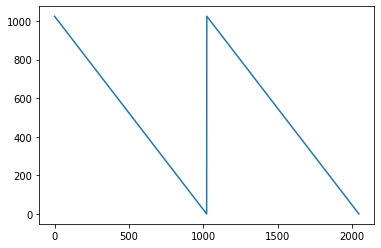

In [203]:
my_correlation=comp_acf(inp)
plt.plot(my_correlation)

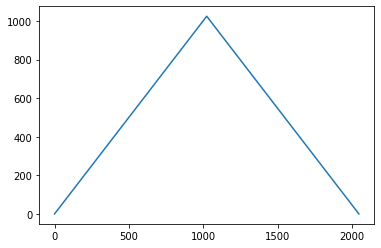

In [204]:
c=scipy.signal.correlate(inp[0],inp[1])
plt.plot(c)

In [261]:
a,ts=block_audio(sig[-1024:],blockSize, hopSize, fs)
my_c=comp_acf(a)
get_f0_from_acf(my_c,44100)

882.0

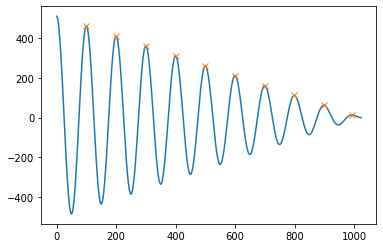

In [248]:
plt.plot(my_c)
plt.plot(a,my_c[a],"x")

In [ ]:
idx=np.where(my_c == my_c[1024:2048].max())+1
a=my_c[idx:]
b=scipy.signal.find_peaks(a)